In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

         data_hora  idade sensação de tristeza ou choro  \
0  6/14/2022 20:02  35-40                           Sim   
1  6/14/2022 20:03  40-45                           Sim   
2  6/14/2022 20:04  35-40                           Sim   
3  6/14/2022 20:05  35-40                           Sim   
4  6/14/2022 20:06  40-45                           Sim   

  irritabilidade com o bebê e o parceiro dificuldade para dormir à Nãoite  \
0                                    Sim     Dois ou mais dias por semana   
1                                    Não                              Não   
2                                    Não                              Sim   
3                                    Sim                              Sim   
4                                    Não     Dois ou mais dias por semana   

  problemas de concentração ou para tomar decisões  \
0                                              Sim   
1                                              Sim   
2                   

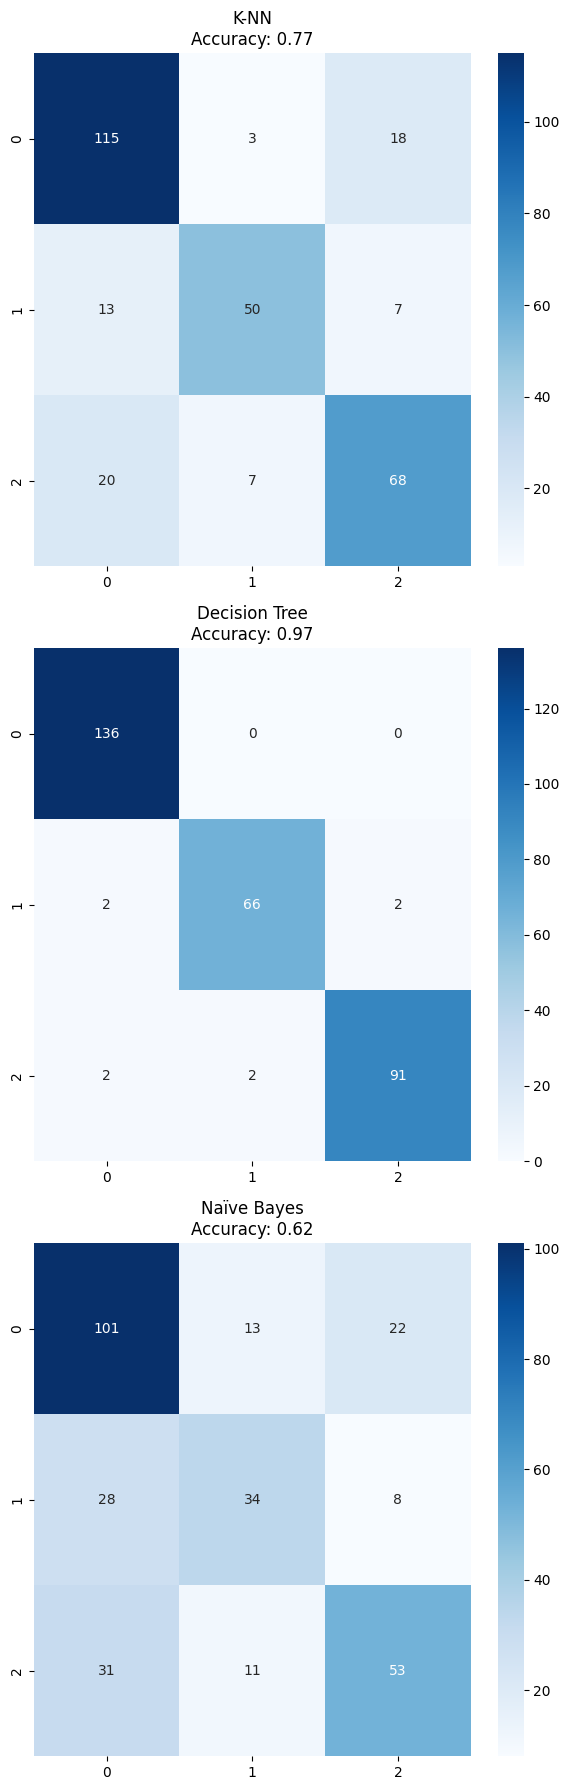


K-NN - Final Score (Accuracy): 0.77
Classification Report:
                    0          1          2  accuracy   macro avg  \
precision    0.777027   0.833333   0.731183  0.774086    0.780514   
recall       0.845588   0.714286   0.715789  0.774086    0.758554   
f1-score     0.809859   0.769231   0.723404  0.774086    0.767498   
support    136.000000  70.000000  95.000000  0.774086  301.000000   

           weighted avg  
precision      0.775652  
recall         0.774086  
f1-score       0.773124  
support      301.000000  

Decision Tree - Final Score (Accuracy): 0.97
Classification Report:
                    0          1          2  accuracy   macro avg  \
precision    0.971429   0.970588   0.978495  0.973422    0.973504   
recall       1.000000   0.942857   0.957895  0.973422    0.966917   
f1-score     0.985507   0.956522   0.968085  0.973422    0.970038   
support    136.000000  70.000000  95.000000  0.973422  301.000000   

           weighted avg  
precision      0.973463

In [15]:
file_path = 'C:/Users/pm920/Documents/Curso ADS 2024/Inteligência Artificial/Trabalho2/dep_pos_parto.csv'
data = pd.read_csv(file_path)

print(data.head())
print(data.info())
print(data.describe())
print(data.isnull().sum())

# Conversão de coluna de data, se existir
if 'date' in data.columns:
    data['date'] = pd.to_datetime(data['date'])
    data['year'] = data['date'].dt.year
    data['month'] = data['date'].dt.month
    data['day'] = data['date'].dt.day
    data['hour'] = data['date'].dt.hour
    data.drop('date', axis=1, inplace=True)  

# Codificação de colunas categóricas
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Separação entre variáveis independentes e dependentes
X = data.iloc[:, :-1] 
y = data.iloc[:, -1]   

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelos
models = {
    'K-NN': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naïve Bayes': GaussianNB()
}

# Treinamento, predição e avaliação dos modelos
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'classification_report': classification_report(y_test, y_pred, output_dict=True),
        'accuracy': accuracy_score(y_test, y_pred)
    }

# Exibição dos resultados de forma vertical
fig, axes = plt.subplots(3, 1, figsize=(6, 18))  # Alterando para 3 linhas e 1 coluna

for ax, (name, result) in zip(axes, results.items()):
    sns.heatmap(result['confusion_matrix'], annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f"{name}\nAccuracy: {result['accuracy']:.2f}")

plt.tight_layout()
plt.show()

# Exibição dos scores finais
for name, result in results.items():
    print(f"\n{name} - Final Score (Accuracy): {result['accuracy']:.2f}")
    print(f"Classification Report:\n{pd.DataFrame(result['classification_report'])}")
